In [7]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [77]:
#Read the data

df=pd.read_csv(r'C:\Users\admin\Documents\movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [28]:
#Look for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(col, pct_missing)

name 0.0
rating 0.010041731872717789
genre 0.0
year 0.0
released 0.0002608242044861763
score 0.0003912363067292645
votes 0.0003912363067292645
director 0.0
writer 0.0003912363067292645
star 0.00013041210224308815
country 0.0003912363067292645
budget 0.2831246739697444
gross 0.02464788732394366
company 0.002217005738132499
runtime 0.0005216484089723526


In [30]:
#Data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [51]:
#Replacing null values in columns budget and gross with their mean
df['budget']=df['budget'].replace(np.nan,np.mean(df['budget']))
df['gross']=df['gross'].replace(np.nan,np.mean(df['gross']))
#Changing data type to int64
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [78]:
#Ordering the data by gross revenue
df=df.sort_values(by=['gross'], inplace=False, ascending= False)

In [60]:
#Removing duplicates from movie name column
df['name']=df['name'].drop_duplicates()

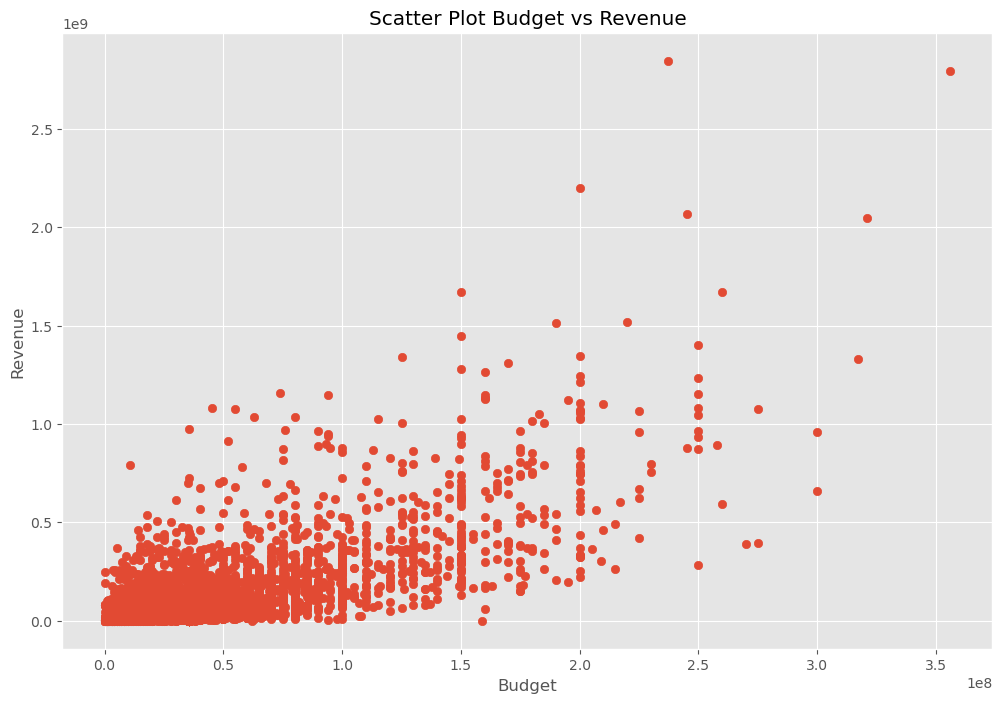

In [63]:
#TScatter plot between budget and revenue
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Scatter Plot Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

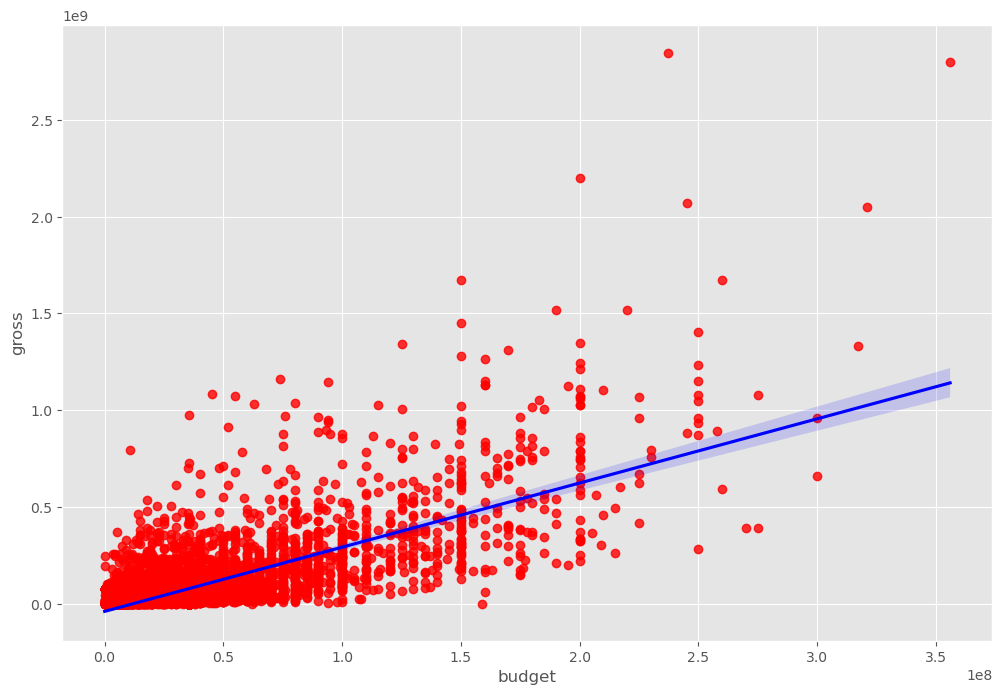

In [67]:
#Regression plot between budget and revenue
sns.regplot(x=df['budget'],y=df['gross'],data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [68]:
#Correlation starting here

In [70]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


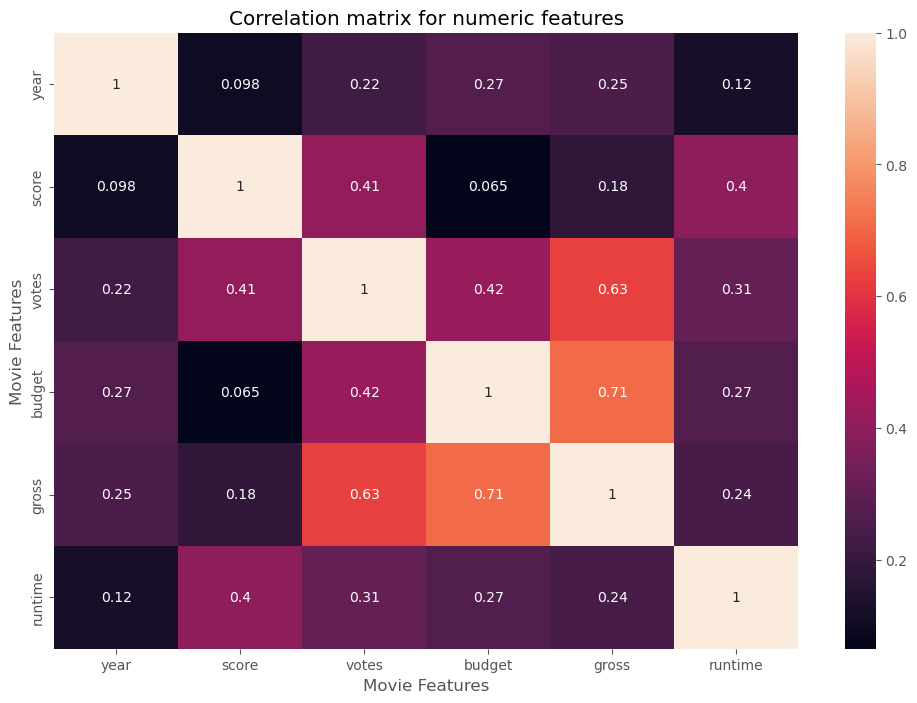

In [72]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [73]:
#Converting non numeric features into numeric for correlation purpose
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,35589876,1400,477,103.0
7625,6720,-1,4,2019,1149,5.7,320.0,2546,2565,1915,55,35589876,790,2308,104.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,35589876,682,1992,93.0
2417,3406,-1,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0


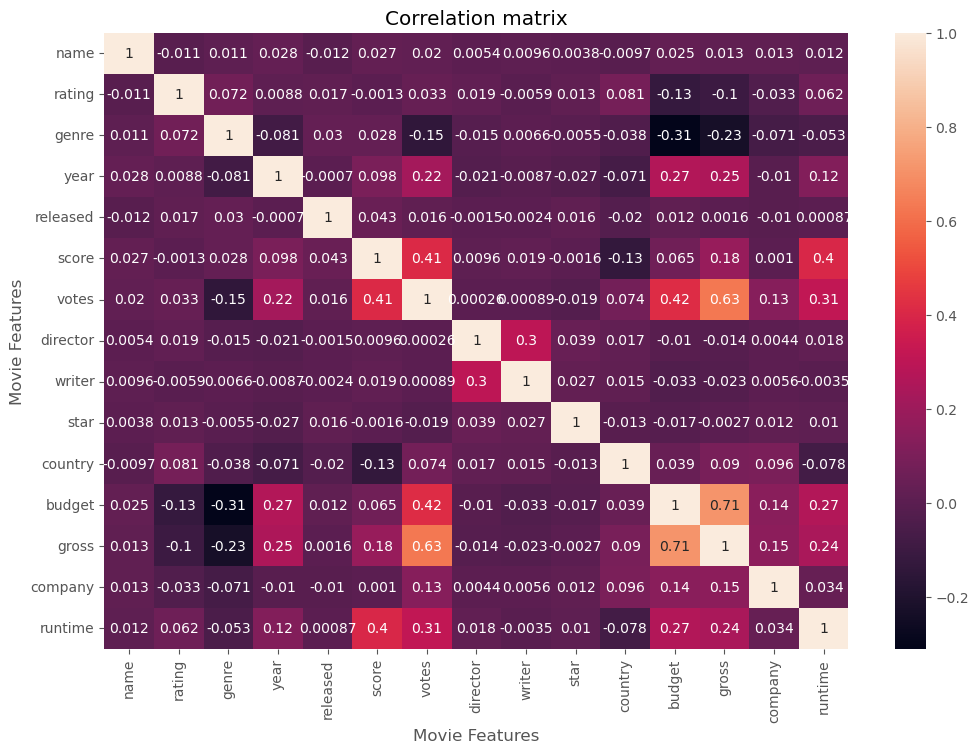

In [80]:
#To find the feature which affects gross revenue the most
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [82]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011422,0.011452,0.028138,-0.011521,0.026947,0.019996,0.005384,0.009561,0.003823,-0.009660,0.025350,0.012564,0.013189,0.011779
rating,-0.011422,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145
genre,0.011452,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711
year,0.028138,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811
released,-0.011521,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000868
score,0.026947,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451
votes,0.019996,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212
director,0.005384,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624
writer,0.009561,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511
star,0.003823,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174


In [86]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.011422
         genre       0.011452
         year        0.028138
         released   -0.011521
                       ...   
runtime  country    -0.078412
         budget      0.265305
         gross       0.241336
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [88]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.310566
budget   genre     -0.310566
genre    gross     -0.230267
gross    genre     -0.230267
genre    votes     -0.145307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [89]:
high_corr=sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.628713
votes     gross       0.628713
gross     budget      0.711270
budget    gross       0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#In the above analysis it can be seen that votes and budget have the highest correlation to gross revenue